## BMIS-2542: Data Programming Essentials with Python 
##### Katz Graduate School of Business, Spring 2021


### Session-5: Exploratory Analysis - Visualization with Seaborn


`Seaborn` is a statistical graphic library that simplifies many common visualization types.<br>
Importing `seaborn` modifies the default `matplotlib` color schemes and plot styles to improve readability and aesthetics.
With data that requires aggregation or summarization before making a plot, using the seaborn package is much simpler.

Read the official seaborn tutorial [here](http://seaborn.pydata.org/tutorial.html?highlight=line%20plot).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True) #https://seaborn.pydata.org/generated/seaborn.set_color_codes.html

### Visualizing the Distribution of a Dataset

[Seaborn Tutorial - Visualizing Distributions](http://seaborn.pydata.org/tutorial/distributions.html)

In [2]:
# load the Tips dataset built into the seaborn module
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips.tip/(tips['total_bill'] - tips.tip) # new column for tipping percentage
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


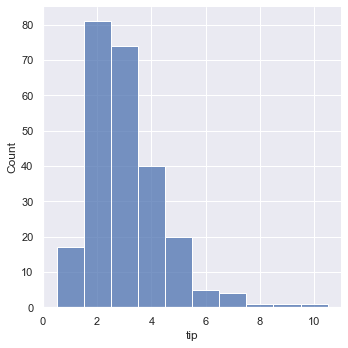

In [3]:
sns.displot(tips, x = 'tip',  bins = 10, discrete = True);


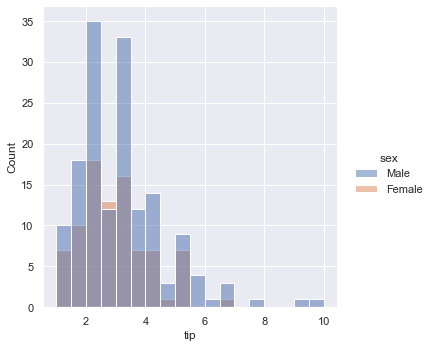

In [4]:
sns.displot(tips, x = 'tip',  hue = 'sex');

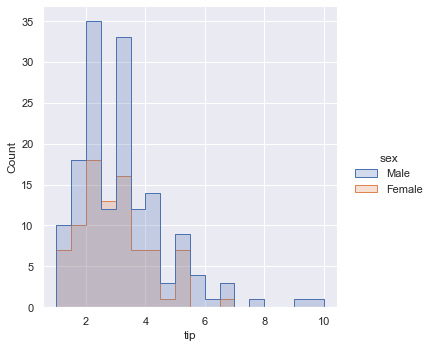

In [5]:
sns.displot(tips, x = 'tip',  hue = 'sex', element='step');

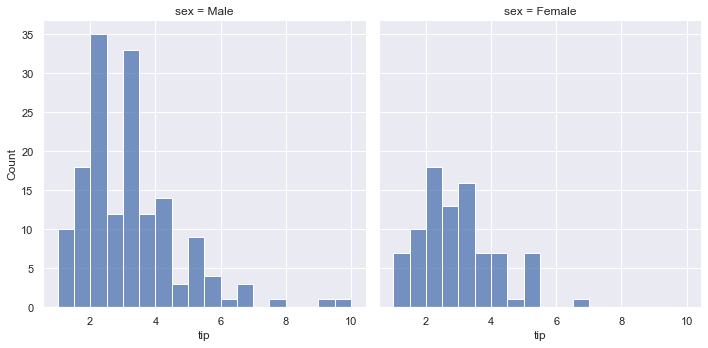

In [6]:
sns.displot(tips, x = 'tip',  multiple='dodge', col = 'sex');

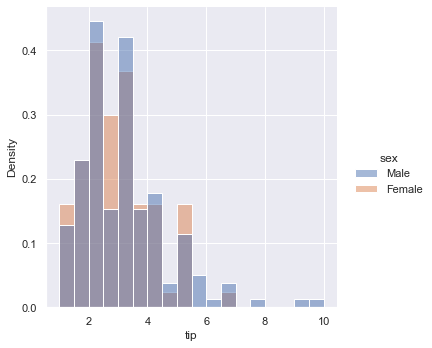

In [7]:
# normalized histograms
sns.displot(tips, x = 'tip',  hue = 'sex', stat='density', common_norm=False);

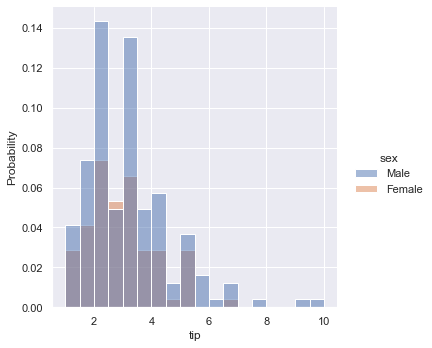

In [8]:
# normalized histograms
sns.displot(tips, x = 'tip',  hue = 'sex', stat='probability');

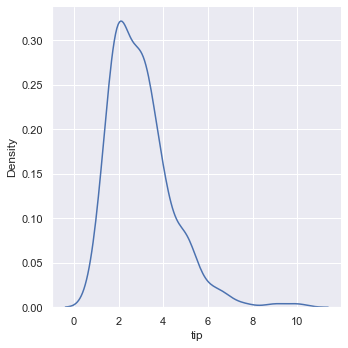

In [9]:
sns.displot(tips, x = 'tip', kind="kde" );

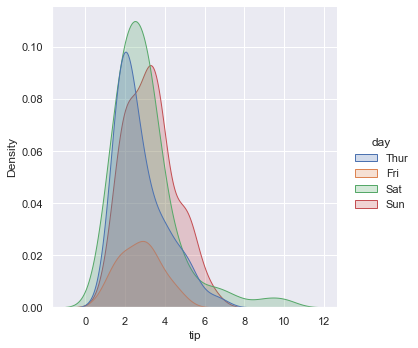

In [10]:
sns.displot(tips, x="tip", hue="day", kind="kde", fill=True);

### Styles
[Seaborn Tutorial on Figure Aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

In [14]:
sns.set(style="darkgrid") # https://seaborn.pydata.org/generated/seaborn.set.html   
# sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("white")

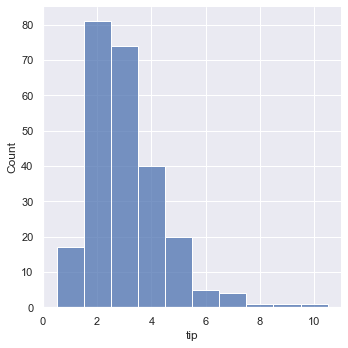

In [15]:
sns.displot(tips, x = 'tip',  bins = 10, discrete = True);

### Relationships
[Seaborn Tutorial - Visualizing Statistical Relationships](http://seaborn.pydata.org/tutorial/relational.html)

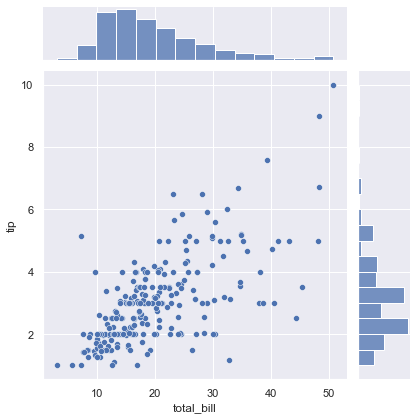

In [16]:
# jointplot: Scatterplot with marginal histograms
sns.jointplot(x='total_bill', y='tip', data=tips);

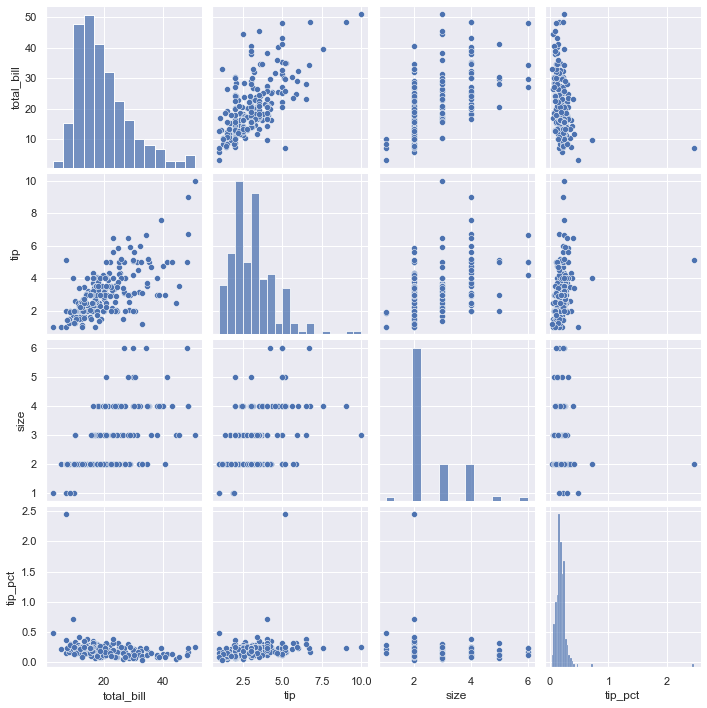

In [17]:
sns.pairplot(tips);

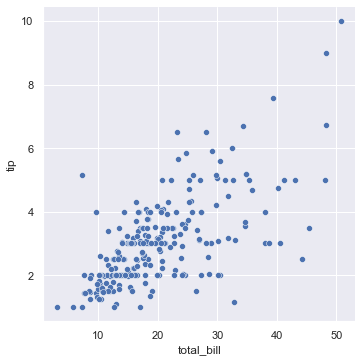

In [18]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter");

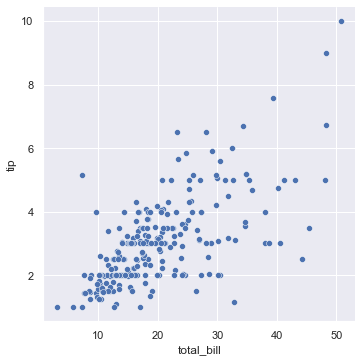

In [19]:
plot1=sns.relplot(x="total_bill", y="tip", data=tips)
plot1.savefig("plot1.jpg")

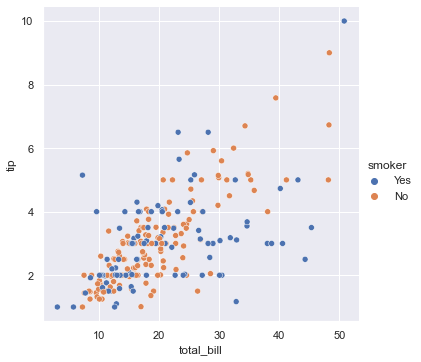

In [20]:
# add third variable to differentiate data points by color
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

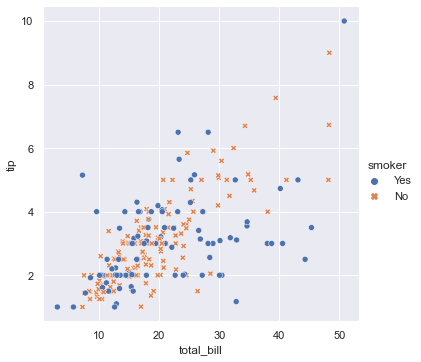

In [21]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",data=tips);

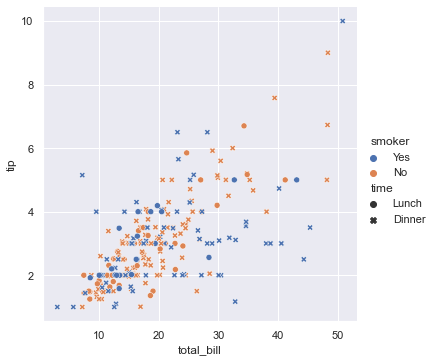

In [22]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips); # 4 variables on the graphic

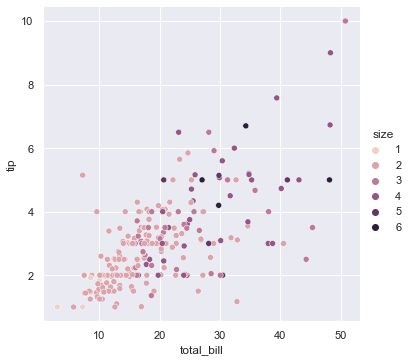

In [23]:
# color scheme is changed to a sequential palatte when the hue parameter is a numerical variable as opposed to a categorical
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

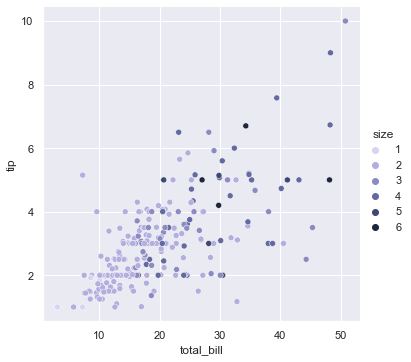

In [24]:
# customizing the sequential palette
# http://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette
sns.relplot(x="total_bill", y="tip", hue="size", palette=sns.cubehelix_palette(start=2.8, rot=.1), data=tips);

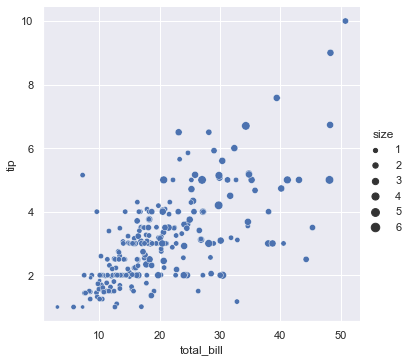

In [25]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips); # size parameter to change the size of the data point

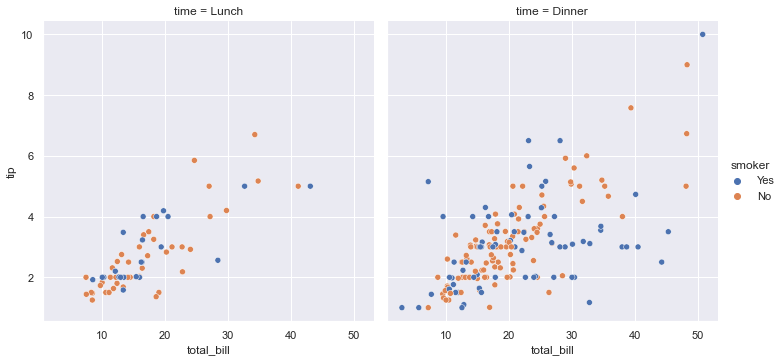

In [26]:
sns.relplot(x="total_bill", y="tip", hue="smoker",col="time", data=tips);

### Categories

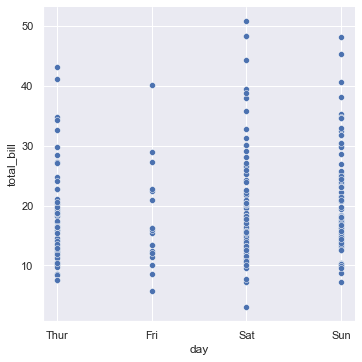

In [27]:
sns.relplot(x="day", y="total_bill", data=tips);

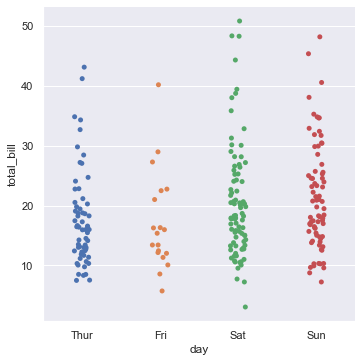

In [28]:
# adjust the positions of points on the categorical axis with a small amount of random “jitter”
sns.catplot(x="day", y="total_bill", data=tips, jitter=True);

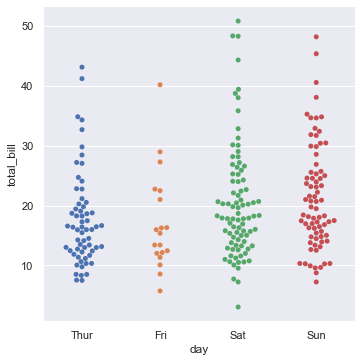

In [29]:
# adjust the points along the categorical axis using an algorithm that prevents them from overlapping
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

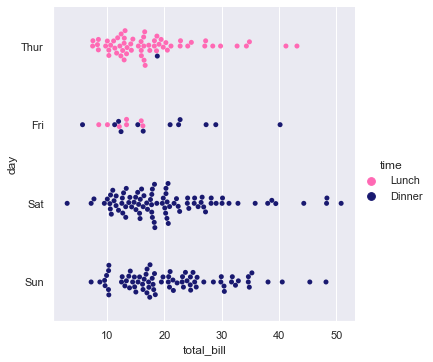

In [30]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", palette=['hotpink','midnightblue'], data=tips);

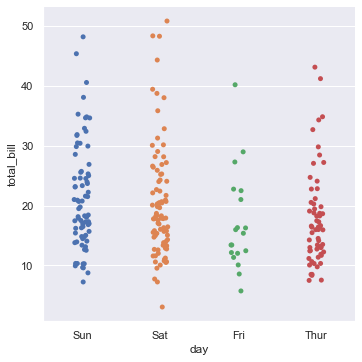

In [31]:
sns.catplot(x="day", y="total_bill", order=["Sun", "Sat", "Fri", "Thur"], data=tips);

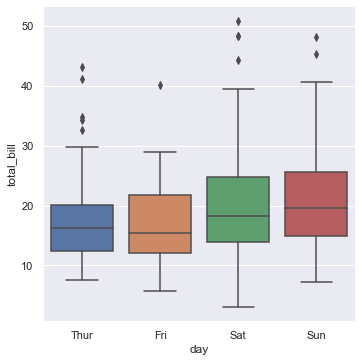

In [32]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

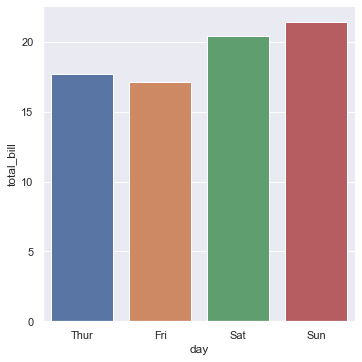

In [33]:
sns.catplot(x="day", y="total_bill", kind="bar", data=tips, ci=True);

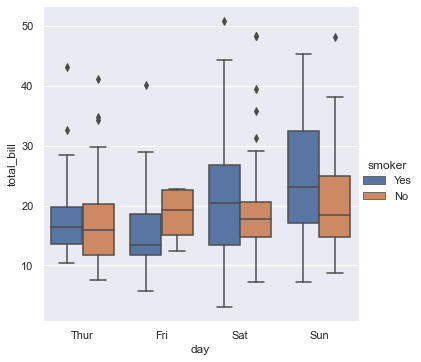

In [34]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips, dodge=True);

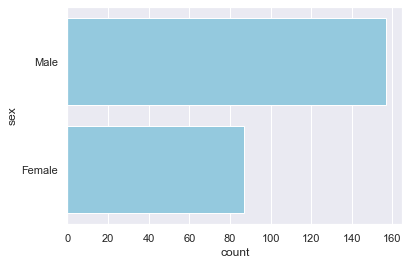

In [35]:
sns.countplot(y="sex", data=tips, color="skyblue");

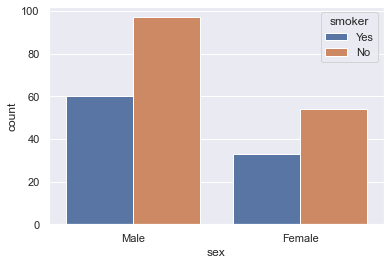

In [36]:
sns.countplot(x="sex", hue='smoker', data=tips);

### Trending/Smoothing Functions

[Seaborn Tutorial - Visualizing Linear Relationships](http://seaborn.pydata.org/tutorial/regression.html)

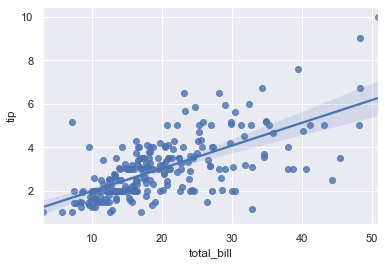

In [37]:
sns.regplot(x=tips.total_bill, y=tips.tip);

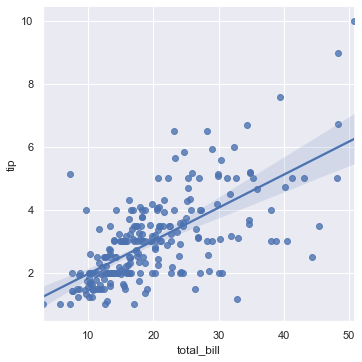

In [38]:
sns.lmplot(x="total_bill", y="tip", data=tips);

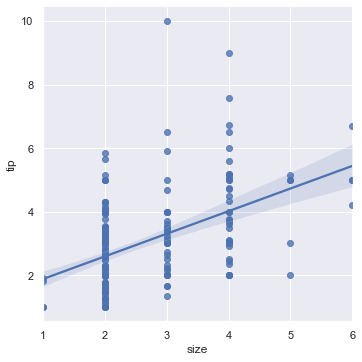

In [39]:
sns.lmplot(x="size", y="tip", data=tips);

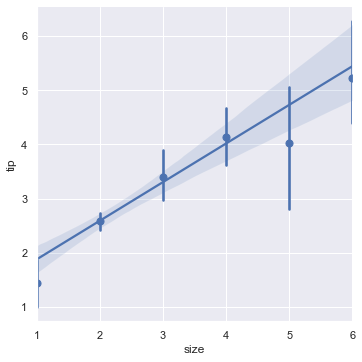

In [42]:
# collapse over the observations in each discrete category to plot an estimate of central tendency
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

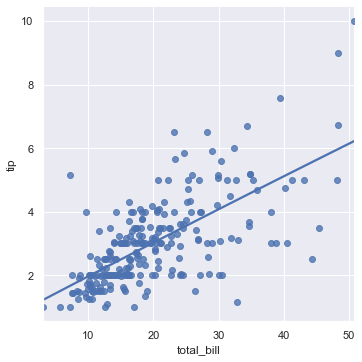

In [40]:
sns.lmplot(x="total_bill", y="tip", data=tips, order=2, ci=None);

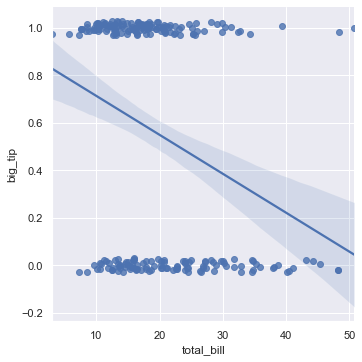

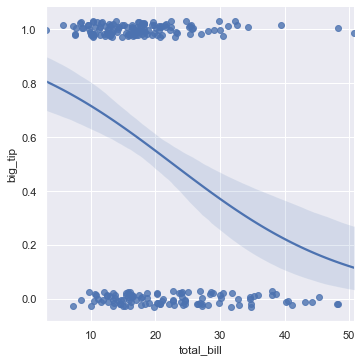

In [41]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

# when the y variable is binary, simple linear regression also “works” but provides implausible predictions
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)

# fit a logistic regression instead
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03);

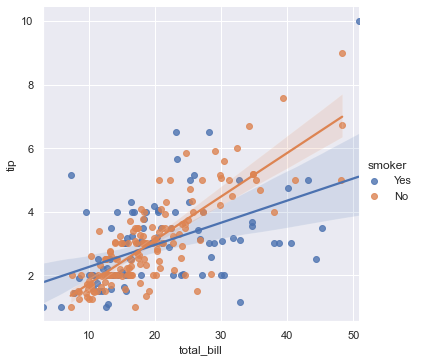

In [43]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

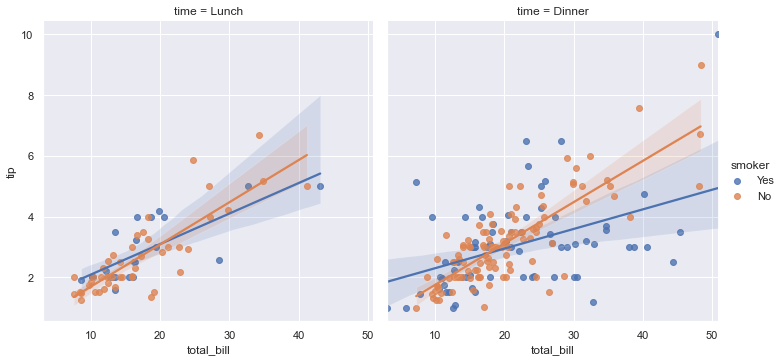

In [44]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

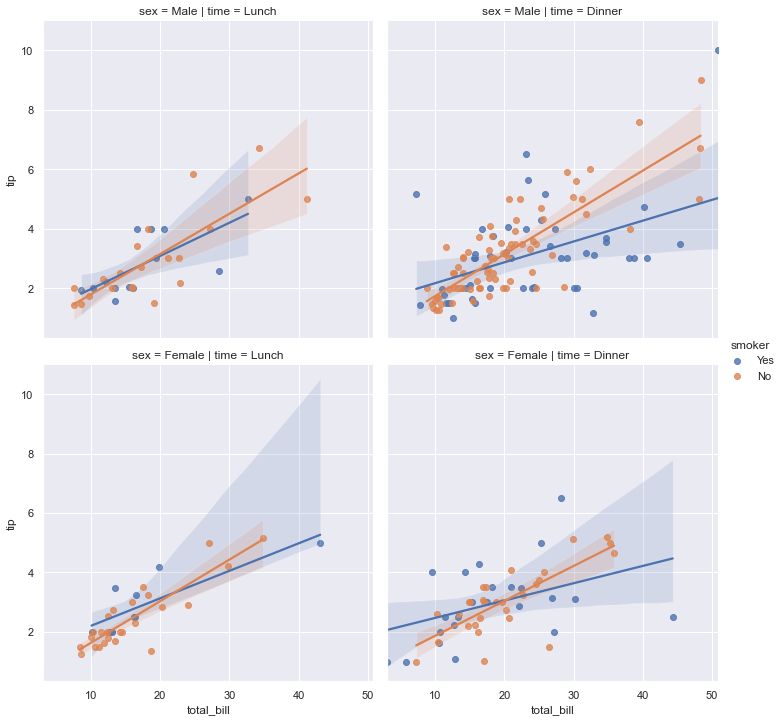

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips);

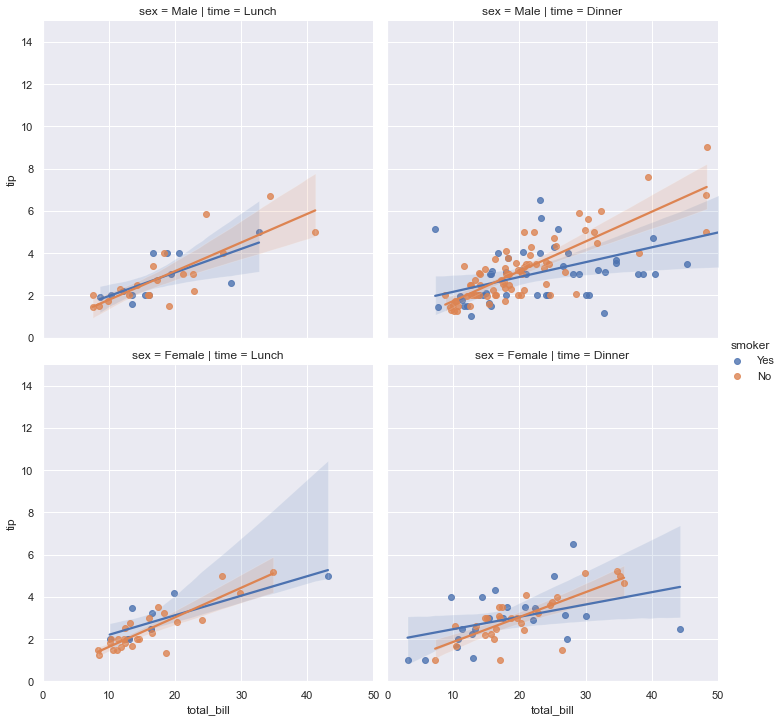

In [46]:
g=sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips)
g.set(xlim=(0, 50), ylim=(0, 15));